<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg", align="left" width="380" height="120">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.893 - Análisis de textos</p>
<p style="margin: 0; text-align:right;">Máster en Ciencia de Datos </p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# Procesamiento y análisis de información textual (PRA1)

En la PRA1 trabajaremos con un dataset de reseñas (opiniones o reviews) y lo analizaremos siguiendo un conjunto de tareas: pasando por la preparación y limpieza de los datos, hasta la evaluación de modelos de clasificación de sentimientos. Por lo tanto, los objetivos de esta actividad son:

- Aplicar técnicas de procesamiento de lenguaje natural para limpiar y preprocesar los datos del dataset elegido.
- Implementar algoritmos de aprendizaje automático, como LDA y clasificación supervisada, para analizar los textos de las reseñas.
- Evaluar el rendimiento de los modelos creados, utilizando las métricas adecuadas

Entonces, en esta primera práctica, revisaremos y aplicaremos los conocimientos aprendidos en los primeros módulos de la asignatura. Concretamente trataremos los siguientes temas.

<ul>
<li>1. Elección y preparación del dataset (10%).
<li>2. Obtención de datos (30%).
<li>3. Detección de temas (30%).
<li>4. Clasificación automática de opiniones positivas y negativas (20%).
<li>5. Evaluación (10%).
</ul>
  
A continuación, se describe la estructura de la práctica a realizar. Considerar que por cada apartado, se han planteado varios ejercicios a resolver; y en algunos pocos casos, se deja la solución para orientar un poco mejor el desarrollo.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 1. Elección y preparación del dataset


## 1.1. Descripción y carga del dataset

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 1.1.1:</strong> En palabras, describir el título del dataset seleccionado, la dirección original (fuente), y una descripción del mismo.

</div>

El dataset utilizado para esta práctica es IMDB Dataset of 50K Movie Reviews.

Fuente original: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Este dataset contiene un total de 50,000 reseñas de películas obtenidas de IMDb cada reseña está clasificada según si la opinión que indica es positiva o negativa.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 1.1.2:</strong> Carga del dataset y descripción de sus principales características: tamaño, estructura, distribución de clase/rating, distribución de longitudes de texto, exploración preliminar del texto de las opiniones (orientada a descubrir potenciales tareas de limpieza a realizar).

</div>

<b>Importante</b>: En caso de haber elegido un dataset sin una columna que denote el sentimiento de cada texto, pero, sí el rating, en este ejercicio, agregar una nueva columna de sentimiento. Por ejemplo, si tenemos los valores 1 a 5 para rating, podríamos considerar a los valores de 1 y 2, como sentimiento negativo (0), y a los valores 4 y 5 como positivo (1). Por ahora, nos vamos a centrar en la clasificación binaria, por tanto, no es necesario considerar a los valores de sentimiento “neutral” o rating=3




In [2]:
import pandas as pd

df = pd.read_csv('./IMDB.csv')

df = pd.DataFrame(df)
print('Tamaño del dataset', df.shape)

df.sample(10, random_state=14)

df = df.sample(n=5000, random_state=42).reset_index(drop=True)


Tamaño del dataset (50000, 2)


Podemos observar como el dataset escogido contiene 50.000 instancias (reseñas de películas).

Respecto a su estructura, éste tiene 2 atributos:

review: reseña sobre la película.
sentiment:variable que indica el sentimiento asociado a reseña (positiva o negativa).

A continuación se realizaran varias exploraciones y visualizaciones para ir comprendiendo el dataset y detectar las posibles tareas de limpieza a realizar.


## 1.2 Limpieza de texto

Antes de trabajar con los textos de las reseñas, hay que limpiarlos. En general, dependiendo del dataset podría ser necesario:

1. Eliminar menciones (@), hashtags (#), o código HTML.
2. Eliminar páginas web.
3. Corregir palabras mal escritas (las que resalten en el corpus).
4. Eliminar duplicados.
5. Convertir contracciones, (por ejemplo, en lugar de wouldn't, se cambiaría a would not).
6. Filtrar tokens no alfabéticos.
7. Filtrar signos de puntuación (!) y quitar espacios doble. Se recomienda no quitar el "." porque luego se usará este signo para crear la lista de sentencias. Como referencia ver el ejemplo de PRA proporcionado (*Ejemplo_PRA1.ipynb*).
9. Convertir texto a minúsculas.

Por cada punto, realizar las verificaciones necesarias para determinar la existencia de cada elemento mencionado en el punto anterior (menciones, hashtags, código HTML, páginas web, etc.) e implementar las acciones de limpieza (según se requiera).

<b>IMPORTANTE</b>:
- Antes de implementar cualquier acción, se sugiere crear una columna, llamada *text*, a partir del contenido de la columna de texto original del datset elegido; y sobre la nueva columna aplicar las tareas de limpieza.
- Por cada acción de limpieza realizada, enlistar al menos una reseña que muestre que la función implementada funciona. Es decir, presentar el texto original y el texto transformado (*text*).
- Agregar las celdas de texto y código necesarias, de tal manera que se realice las verificaciones sugeridas, y se dé solución a los problemas de calidad de datos encontrados. Como orientación, se recomienda revisar el archivo <b>Ejemplo_PRA1.ipynb</b> para ver la mejor forma de organanizar la solución.

positive    50.38
negative    49.62
Name: sentiment, dtype: float64

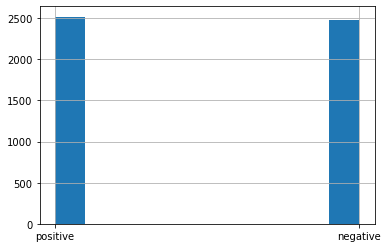

In [3]:
#Graficamos un histograma para tener una idea de la distribución de las reseñas y ver el poncentaje de cada clase.

df.sentiment.hist()

# Distribución de calificaciones por sentimiento:
df['sentiment'].value_counts(normalize=True) * 100 # valor porcentual


Como observamos en el histograma, el conjunto está balanceado, incluyendo 25,000 reseñas positivas y 25,000 negativas, lo cual lo convierte en una excelente fuente de datos para tareas de clasificación binaria de sentimientos.

Ahora exploremos un poco más el texto de las reseñas para ver qué tareas de limpieza se deben realizar.

<AxesSubplot:>

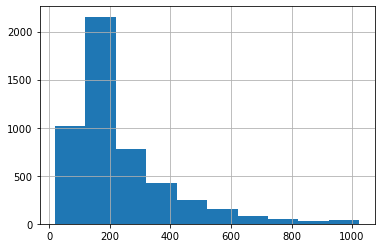

In [4]:
def words_counter(text):
    if type(text) != float:
      return len(text.split()) # contar palabras de cada reseña
    else:
      return None

df['length'] =  df['review'].apply(words_counter)
# Graficar histograma de longitud de textos:
df.length.hist()

Ahora vamos a revisar si existen reseñas cortas que no aporten demasiada información.

In [5]:
df[df.length<20]


,review,sentiment,length
1328,The characters are unlikeable and the script i...,negative,19
4899,Absolutely fantastic! Whatever I say wouldn't ...,positive,18


Como se pueden observar, aunque sean cortas, las reseñas muestran bien el sentimiento negativo o positivo y aportan razones que justifican la elección de dicho sentimiento, así que de momento se van a mantener las reseñas más cortas y se procede con la limpieza del dataset.

In [6]:
#Expandir la visualización de la columna de frases:
pd.set_option('display.max_colwidth', None)
df.sample(5, random_state = 223) #Texto completo de algunas frases


,review,sentiment,length
4643,"This small John Ford western with no 'stars' but a cast of character actors is one of his masterpieces. It has a documentary-like feel to it as it traces the journey West of a party of Mormons and it may be the most authentic looking of all Ford's films, (it's on par with ""The Sun Shines Bright"" which he made a couple of years later).<br /><br />There is a plot of sorts, (a group of bank robbers join the wagon train at one point), but the film's dramatic highlights are almost incidental. The splendid performances of Ford's stock company, (Ben Johnson, Harry Carey Jr, Ward Bond, Jane Darwell etc), adds considerably to the film's authenticity while the nearest the film gets to a full-bodied star performance is Joanne Dru's Denver. Dru was a much finer actress than she was ever given credit for as were Bond and Johnson, who at least was finally awarded with the recognition of an Oscar for his work in ""The Last Picture Show"". As he said himself, 'It couldn't have happened to a nicer fella'. Add Bert Glennon's superb location photography and you have a genuine piece of Americana that couldn't have some from anyone other than Ford. This is a film that truly honors America's pioneers and is full of sentiment and feeling.",positive,219
1630,"The Eternal Jew (Der Ewige Jude) does not have what we today would call the markings of a scholarly document: rather than naming experts or sources to support what it says, it simply says, without opposition, what it wants us to believe (one will concede that American newsreels of that period were also much less regulated than would seem ethical to a modern audience, often inserting dramatized scenes and passing them off as actual news footage). Add to this directed propaganda the fact that filmmaker Hippler was ""preaching to the converted,"" not so much asking gentile Europeans to hate the Jews as validating the feelings so many of them must have held already, in order to have allowed the holocaust that followed. The weakest link in the film's logic shows in its ""rat"" analogy, wherein it goes on to explain the behavior of rats, and then adds something to the effect of ""Well, Jewish people are like that too."" Similarly it characterizes Jewish people as ugly by showing ugly Jewish people in comparison to attractive gentiles; the accompanying leap of faith is that ugly is bad. The film appears to contradict itself a few times, for example by attacking Western painters who portrayed Old Testament characters as light-skinned Europeans; thereby the text admits that so-called ""Hebrew"" ethnicity is in fact an ingrained aspect of Christian culture. It also shows ghetto Jews willingly living in roach-infested filth, despite the supposed treasure they've hoarded, and then flip-flops by saying that these same undesirables live in wealth and luxury as soon as they leave the ghetto. Incidentally, who wouldn't? The use of scenes from a well-known American film, House of Rothschild, shows an equally blurry deployment of logic. First the film is denounced as having been made by Jews; then it is apparently used by Hippler to verify the deceptiveness of Jews (the aforementioned pretense of poverty by ghetto Jews, shown as a means of avoiding taxation, although the Rothschild character's ""spin"" is that Jews are taxed excessively); finally the Rothschild film is once again execrated for implying that the famed banking family invented the checking account. This apparent indecisiveness in whether the American footage is shown positively or negatively might become clearer with repeated viewings, but at first sight it makes for some murky moviewatching. For all of Eternal Jew's imperfections, I was at first surprised that the IMDb viewer rating for this film is as high as it is, just shy of a ""5"" to date. I'd say the reason is that EJ's documentary value has exceeded its original purpose, offering us, unintentionally, a look into the lives of European Jews as they would not b

Primero, se crea una nueva columna llamada text para realizar en ella las tareas de preprocesamiento y limpieza.

In [7]:
df['text'] = df['review'] 

El código html se eliminará como parte del preprocesamiento. Seguidamente, se procederá a explorar si existen menciones o urls.

In [8]:
import re


def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)
df['text'] = df['text'].apply(remove_html_tags)
df.iloc[2096][['review', 'text']]



review    I don't usually comment on films or TV shows but had to post a comment about Las Vegas.<br /><br />Naturally here in the UK we are about 2/3rd's through the 3rd season and though i have managed to watch the last series of season 3 ( via other means ) i'm still glued every Friday at 9pm.<br /><br />From the very first episode of season 1 i have been a big big fan of this show and own all 3 seasons on DVD, yes i cannot wait for season 4 to start in October.<br /><br />So why do i love this show so much, well i have to agree with the last poster.... James Caan, i know one person cannot make a team but Big Ed Deline was made for Caan or maybe it was the other way around, i read that the producers were considering Martin Sheen for Ed Deline.... Do'h no way!!! i also agree that Caan's character is getting very soft, i also preferred the tough take no sh*t Big Bad Eddy D that we saw in season 1 & 2, he seems to have mellowed out.<br /><br />As i said no one person makes the team by 

Se observa como se han eliminado las etiquetas html, más adelante se gestionarán los signos de puntuación.

In [9]:
pattern = r'(@\w+)'
mentions_df = df[df['text'].apply(lambda x: bool(re.search(pattern, str(x))))]
mentions_df[['text']].head(10)


,text
325,"This movie was everything but boring. It deals with reality. To the people who think this movie was boring, open your eyes to the real problems in our society. Our children are dying. The consequences of alcohol and drug abuse are not to be ignored. I work in a correctional facility as a chemical dependency counselor,and i deal with these problems every day. People of all ages and all walks of life are effected by the consequences of their alcohol and drug abuse. It destroys families, hurts people and leads to serious brain damage,all kinds of health problems, and death. It is all preventable. This movie should be shown in every high-school in the world. If anyone owns this movie and wants to sell it, or sell me a copy, please e-mail me at: Ottenbreit2@netzero.net thank you"
2849,"I'm like the rest of the fans who love this comedy,i've been waiting for it on DVD. I've got it on VHS and got so fed up waiting for a release and worrying that my VHS copy would ruin i got the equipment to get it onto DVD. The picture and sound are excellent to my utter surprise. If anyone else want's a copy drop me a line atstone_stew@yahoo.co.uk and for £7.00 i'll put it onto a DVD,print the DVD and get it in the post to you. £7.00 just covers my costs & recorded delivery etc with maybe a little over so i'm not after making money out of it,i'd just like the world to see this ignored gem of a comedy.I recently saw a copy of ebay got for over £26,amazing. How can they not release this classic. Email me for payment details like cheque or Paypal etc etc"
3217,"I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira tcampo23@aol.com"
3384,"i love this movie. is it on air anymore? what can i do to get it on air again because i miss this movie when does this movie air again? i love this movie so much. does anyone know how long it has been since it was last on Disney?it has been a very very long time and i am so sick of waiting!i want to see Susie Q again. i swear, they take all the good movies off air and play new stupid gay ones that are fake and retarded. i miss this movie, wish upon a star, Kazaam with Shaquille O'neil, and a bunch more. where did all the good movies go? i want them back.i miss all the good movies and they don't have them anymore. if anybody finds out if Susie Q or any good old Disney movie comes out will you please let me know, my email is girlygirl148@aol.com girlygirl(no blank space)148. thank you and i hope you want this movie back too. have a great day"
4141,"It opens with your cliche overly long ship flying through space. All I could think at this point was ""Spaceballs"" and hoping there'd be a sticker on back that said ""We break for Nobody."" The movie then shows some cryogenic freezers with Vin Diesel's narration. I've always thought his voice sounded cool ever since I saw Fast and the Furious. From when I found out he was as criminal, I thought the movie was going to be cliche. It was. It was very cliche and fate seemed to be against them at every turn. Black out every 22 years. Lucky them, they land on that day. Al

Se observan emails y palabras malsonantes. Se procede a la eliminación de los emails ya que no aportan información para nuestro análisis.

In [10]:
def remove_emails(text):
    return re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', ' ', text)

df['text'] = df['text'].apply(remove_emails)
df.iloc[3217][['review', 'text']]


review    I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira tcampo23@aol.com
te

In [11]:
pattern2 = r'(http\S+|www\.\S+)'
urls_df = df[df['text'].apply(lambda x: bool(re.search(pattern2, str(x))))]
urls_df

,review,sentiment,length,text
211,"This is absolutely the best 80s cartoon ever, maybe the best cartoon of all time. It had everything action, adventure, thrill, and much more...<br /><br />I can't imagine how hard it was for Ruby-Spears company to make this great cartoon, there has been spent a lot of money for this masterpiece of work and it was worth it, for example just the beaming down scenes were hard because I wouldn't call the 1980s for a great technology year with computers like now in the world we live in so the beaming down scenes were excellent!<br /><br />The cartoons will never be the same as they were before, that is why I hope that they all will be released on DVD specially The Centurions as it's my favorite. I have the whole complete set of 65 episodes on DVD-r but it's not the same because if they were released on DVD the people in the world would be able to buy it and see the DVD's in almost every store which means a lot to the fans. My good friend Ted made this petition to either get the show back on TV or better on DVD, that is if we get many requests to get them back on DVD.<br /><br />So please help us by signing the petition at http://www.petitiononline.com/6600F/petition.html",positive,219,"This is absolutely the best 80s cartoon ever, maybe the best cartoon of all time. It had everything action, adventure, thrill, and much more...I can't imagine how hard it was for Ruby-Spears company to make this great cartoon, there has been spent a lot of money for this masterpiece of work and it was worth it, for example just the beaming down scenes were hard because I wouldn't call the 1980s for a great technology year with computers like now in the world we live in so the beaming down scenes were excellent!The cartoons will never be the same as they were before, that is why I hope that they all will be released on DVD specially The Centurions as it's my favorite. I have the whole complete set of 65 episodes on DVD-r but it's not the same because if they were released on DVD the people in the world would be able to buy it and see the DVD's in almost every store which means a lot to the fans. My good friend Ted made this petition to either get the show back on TV or better on DVD, that is if we get many requests to get them back on DVD.So please help us by signing the petition at http://www.petitiononline.com/6600F/petition.html"
489,"As with all the other reviewers, this movie has been a constant in my mind after 30 years. I recall going to the library researching all that I could on this story. I even wrote to the PBS station for more information. Despite all this, all I was able to find out was that it was a story printed in a newspaper in the early part of the 1900s.<br /><br />Fastward to 2002, after years of searching ebay for on a weekly basis and there it was, a VHS copy of the movie. There was one other bidder but I was determined to win this movie. The losing bidder wrote me asking for a copy which I gave her. Despite owning a copy, I still searched and searched finally finding a site that sold a DVD copy of the movie. You can find it at: http://www.johntopping.com/Harvey%20Perr/War%20Widow/war_widow.html",positive,146,"As with all the other reviewers, this movie has been a constant in my mind after 30 years. I recall going to the library researching all that I could on this story. I even wrote to the PBS station for more information. Despite all this, all I was able to find out was that it was a story printed in a newspaper in the early part of the 1900s.Fastward to 2002, after years of searching ebay for on a weekly basis and there it was, a VHS copy of the movie. There was one other bidder but I was determined to win this movie. The losing bidder wrote me asking for a copy which I gave her. Despite owning a copy, I still searched and searched finally finding a site that sold a DVD copy of the movie. You can find it at: http://www.johntopping.com/Harvey%20Perr/War%20Widow/war_widow.html"
983,"Again, li

In [12]:
def remove_urls(text):
    return re.sub(r'(http\S+|www\.\S+)','.', text)

df['text'] = df['text'].apply(remove_urls)
df.iloc[2060][['review', 'text']]


review    Airwolf The Movie, A variation on the original 2 part pilot, Yet the movie although shorter, does contain extra footage Unseen in the 2 hour pilot The pilot is much more of a pilot than the movie Where as a pilot movie is normally the same (2 parter combined) But the movie is actually a different edit with extras here and cuts there.<br /><br />Worth a look, even if you have the season 1 DVD set, I'd still pick up a copy of the "movie" It's still in some shops like virgin, Woolworths and the likes of mixed media stores, although it generally needs ordering, But it saves needing to buy online (as many of us still don't do or trust online shopping) but if you look around airwolfs in stores<br /><br />Airwolf was truly 1 of the 80's most under rated shows.<br /><br />A full size Airwolf is currently being re-built for a Helicopter Museum :) Info and work in progress pictures are over at http://Airwolf.org Also with Airwolf Mods for Flashpoint and Flight Sim Games It seams she's 

Una vez eliminadas las etiquetas html, las urls y los emails se procede a revisar si existen reviews duplicadas y vamos a tratar lals contracciones.

In [13]:
duplicated_reviews = df['review'].duplicated(keep='first')
print(f"Número total de reseñas duplicadas: {duplicated_reviews.sum()}")


Número total de reseñas duplicadas: 7


Se observa que en el dataset encontramos 7 filas duplicadas por tanto se procederá con su eliminación.

In [14]:
df = df.drop_duplicates(keep='first')
print('Tamaño del dataset', df.shape)


Tamaño del dataset (4993, 4)


Ahora vamos a explorar si existe texto con contracciones.

In [15]:
df[df['text'].str.contains("'", case=False, na=False)].head(1)

,review,sentiment,length,text
0,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the world title against Lex Luger this match was boring and it has a terrible ending. However it deserves 8/10",positive,201,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the world title against Lex Luger this match was boring and it has a terrible ending. However it deserves 8/10"


En este caso, sí es necesario implementar un mecanismo de extensión de contracciones, una forma es usar el paquete contractions.


In [16]:
import contractions

df['text']=df['text'].apply(lambda x:contractions.fix(x))

df.iloc[0][['review', 'text']]


review       I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna

El siguiente paso será el de filtrar tokens no alfabéticos y signos de puntuación (no eliminaremos los puntos para así detectar finales de frase).

In [17]:
def remove_special_characters_keep_dot(text):
    cleaned = re.sub(r'[^a-zA-Z\s.]', ' ', str(text)) 
    cleaned = re.sub(r'(\.\s*){2,}', '.', cleaned)
    return cleaned
    
df['text'] = df['text'].apply(remove_special_characters_keep_dot)
df.iloc[0][['review', 'text']]


review       I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna

Finalmente, se observa que hay espacios dobles así que se procede a eliminarlos.

In [18]:
class ExtraSpacesReplacer(object):
    """ Replaces extra spaces in a text.
    >>> replacer = ExtraSpacesReplacer()
    """
    def replace(self, text):
        s = str(text)
        s = re.sub(r'\s{2,}', ' ', s)      # elimina espacios dobles o más
        s = re.sub(r'\s+\.', '.', s)       # elimina espacios antes de punto
        s = re.sub(r'\.(?=[^\s])', '. ', s)# Asegurar espacio después del punto si no lo hay

        return s.strip()

spaces_replacer = ExtraSpacesReplacer()

df['text'] = df['text'].apply(spaces_replacer.replace)

df.iloc[0][['review', 'text']]


review    I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna de

# 2. Obtención de datos

En esta parte analizaremos el texto, *encontraremos el conjunto de términos multipalabra relevantes del dataset y analizaremos el objeto y aspectos de las opiniones* del texto utilizando el modelo Word2Wec. Para ello empezaremos calculando los **mejores bigramas y trigramas de las opiniones del dataset y evaluarlos** según distintas métricas (PMI y Likehood). Posteriormente, detectaremos los **n-gramas que cumplan un patrón sintáctico de un sintagma nominal** (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural) y, terminaremos **detectando colocaciones** con un modelo de detección de frases, por ejemplo con el módulo Phraser de Gensim. Una vez analizados los terminos multiplalabra, **crearemos un modelo word2vec** con las opiniones lematizadas y lo utilizaremos para analizar los targets de las opiniones.


In [19]:
# Para este apartado es necesario cargar las siguientes librerías:
import nltk
nltk.download('all')
from nltk import pos_tag, word_tokenize
from nltk.collocations import *

/Users/noelia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/noelia/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is al

[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to /Users/noelia/nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]

[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/noelia/nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[n

In [20]:
#Importar la lista de stopwords en el idioma de los *reviews* de la libreria NLTK y agregamos algunas adicionales:
stopwords =  ["would", "vs", "anyways"]
stopwords = stopwords + nltk.corpus.stopwords.words('english')
stopwords[:15] # extracto de stopwords.

['would',
 'vs',
 'anyways',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any']

### 2.1. Detección de colocaciones

Las colocaciones son términos multipalabra, es decir, secuencias de palabras que, en conjunto, tienen un significado que difiere significativamente del significado de cada palabra individual (e.g. "new york").

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 2.1.1:</strong> Calcular los mejores bigramas y trigramas de las opiniones. De los mejores bigramas y trigramas, elige a los que no comienzan, ni terminan con una stopword.
<br>
<b>Salida esperada:</b> Imprimir los primeros 20 n-grams obtenidos con cada métrica.
</div>
<br>
<b>Pasos a realizar</b>:

-  Obtener los tokens del texto de las opiniones y etiquetarlos por su PoS
-   Aplicar las métricas PMI y Likehood Ratio para calcular los mejores bigramas y los mejores trigramas a partir de los tokens etiquetad ylos que no comcenzan ni terennan con una stopword.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Primer paso</i>: Obtener los tokens del texto de las reseñas. Etiqueta estos tokens por su PoS.

Utiliza los métodos *word_tokenize* para tokenizar el texto de las reseñas y  *pos_tag* para determinar la etiqueta de cada token.
<br>
<b>Salida esperada:</b> Imprime los diez primeros tokens, con su respectiva etiqueta:
</div>
<br>


In [21]:
opinions = " ".join(df['text'])
opinions[:250]


'I really liked this Summerslam due to the look of the arena the curtains and just the look overall was interesting to me for some reason. Anyways this could have been one of the best Summerslam s ever if the WWF did not have Lex Luger in the main eve'

In [22]:
alpha_tokens = [w.lower() for w in word_tokenize(opinions) if re.match("^[a-zA-Z]+.*", w)]
alpha_tokens_2 = [w for w in word_tokenize(opinions) if re.match("^[a-zA-Z]+.*", w)]
tagged_tokens = nltk.pos_tag(alpha_tokens)
tagged_tokens_2 = nltk.pos_tag(alpha_tokens_2)

print(tagged_tokens[:10])
print(tagged_tokens_2[:10])
interesting_tags = ['PRP', 'PRP$', 'WP', 'WP$']
interesting_tags_list = [word.lower() for word, tag in tagged_tokens_2 if tag in interesting_tags]
stopwords = stopwords + interesting_tags_list




[('i', 'NN'), ('really', 'RB'), ('liked', 'VBD'), ('this', 'DT'), ('summerslam', 'NN'), ('due', 'JJ'), ('to', 'TO'), ('the', 'DT'), ('look', 'NN'), ('of', 'IN')]
[('I', 'PRP'), ('really', 'RB'), ('liked', 'VBD'), ('this', 'DT'), ('Summerslam', 'NNP'), ('due', 'JJ'), ('to', 'TO'), ('the', 'DT'), ('look', 'NN'), ('of', 'IN')]



<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Segundo paso</i>: Calcular los 300 mejores bigramas y los 300 mejores trigramas a partir de los tokens etiquetados (e.g. [(we, PRP), ...]) del texto. Utiliza las métricas PMI y Likehood Ratio.
<br>
<b>Condición</b>: De la lista de mejores bigramas y trigramas, elige a los que no comienzan ni terminen con una stopword. Para el filtrado de stopwords considera:
- La lista previamente cargada (desde el paquete NLTK), y
- Las categorías POS que representan a palabras vacías como determinantes, preposiciones, entre otras.
<br>
<b>Salida esperada:</b> Imprime los primeros 20 n-grams obtenidos con cada métrica.
</div>
  

Recordemos la clasificación de etiquetas PoS.

<b>Etiquetas PoS</b>

<ul>
<li>DT: Determinante</li>
<li>JJ: Adjetivo</li>
<li>NN: Nombre en singular</li>
<li>NNS: Nombre en plural</li>
<li>VBD: Verbo en pasado</li>
<li>VBG: Verbo en gerundio</li>
<li>MD: Verbo modal</li>
<li>IN: Preposición o conjunción subordinada</li>
<li>PRP: Pronombre</li>
<li>RB: Adverbio</li>
<li>RP: Partícula</li>    
<li>CC: Conjunción coordinada</li>
<li>CD: Numeral</li>
</ul>

In [23]:
no_pos_in = ['DT', 'IN', 'PRP', 'CC', 'VBG', 'VBD', 'RP', 'TO']
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

def get_coll_candidates(alpha_tokens):
    bigramcandidates = BigramCollocationFinder.from_words(alpha_tokens)
    trigramcandidates = TrigramCollocationFinder.from_words(alpha_tokens)
    return bigramcandidates , trigramcandidates

def re_filter_candidates(bigram_coll_candidates, trigram_coll_candidates):
    bigram_coll_candidates.apply_word_filter(lambda w: (re.match(r'\W', w)))
    trigram_coll_candidates.apply_word_filter(lambda w: (re.match(r'\W', w)))
    return bigram_coll_candidates, trigram_coll_candidates

def get_n_best_candidates(bigram_candidates, trigram_candidates, n_best_collocations, measure='pmi'):
    if measure == 'pmi':
        nbest_bigram_candidates = bigram_candidates.nbest(bigram_measures.pmi, n_best_collocations)
        nbest_trigram_candidates = trigram_candidates.nbest(trigram_measures.pmi, n_best_collocations)
    elif measure == 'likelihood':
        nbest_bigram_candidates = bigram_candidates.nbest(bigram_measures.likelihood_ratio, n_best_collocations)
        nbest_trigram_candidates = trigram_candidates.nbest(trigram_measures.likelihood_ratio, n_best_collocations)
    else:
        raise ValueError("La métrica debe ser 'pmi' o 'likelihood'")
    return nbest_bigram_candidates, nbest_trigram_candidates

def is_valid_collocation(candidate):
    if candidate[0] in stopwords or candidate[-1] in stopwords:
        return False
    tagged = nltk.pos_tag(candidate)
    if tagged[0][1] in no_pos_in or tagged[-1][1] in no_pos_in:
        return False
    return True

def filter_collocation_candidates(candidates):
    return [c for c in candidates if is_valid_collocation(c)]

def get_collocations_from_tokens(alpha_tokens, n_best_collocations=300, measure='pmi'):
    bigram_candidates, trigram_candidates = get_coll_candidates(alpha_tokens)
    bigram_candidates, trigram_candidates = re_filter_candidates(bigram_candidates, trigram_candidates)
    best_bigrams, best_trigrams = get_n_best_candidates(bigram_candidates, trigram_candidates, n_best_collocations, measure)
    candidates = best_bigrams + best_trigrams
    print(f"NGRAMAS CANDIDATOS A SER COLOCACIONES ({measure.upper()}):")
    print(candidates[:20], '\n')
    filtered = filter_collocation_candidates(candidates)
    return ["_".join(c) for c in filtered]

collocations_pmi = get_collocations_from_tokens(alpha_tokens, 300, measure='pmi')
print("\nTop 20 (PMI):", collocations_pmi[:20])

collocations_lr = get_collocations_from_tokens(alpha_tokens, 300, measure='likelihood')
print("\nTop 20 (Likelihood Ratio):", collocations_lr[:20])



NGRAMAS CANDIDATOS A SER COLOCACIONES (PMI):
[('aaja', 'nachle'), ('abdul', 'sampled'), ('abi', 'feij'), ('abolished', 'concretely'), ('achala', 'sachdev'), ('acp', 'anbuselvan'), ('activists', 'academics'), ('administrative', 'drudge'), ('adolph', 'zukor'), ('adopting', 'lottie'), ('adriana', 'doria'), ('aeon', 'flux'), ('agua', 'dolee'), ('ajay', 'devgan'), ('alarik', 'jans'), ('albans', 'hemel'), ('aldo', 'tonti'), ('alessandra', 'torresani'), ('aline', 'macmahon'), ('americian', 'falangist')] 


Top 20 (PMI): ['aaja_nachle', 'abi_feij', 'abolished_concretely', 'achala_sachdev', 'acp_anbuselvan', 'activists_academics', 'administrative_drudge', 'adolph_zukor', 'adriana_doria', 'aeon_flux', 'agua_dolee', 'ajay_devgan', 'alarik_jans', 'albans_hemel', 'aldo_tonti', 'alessandra_torresani', 'aline_macmahon', 'americian_falangist', 'amores_perros', 'amuleto_secreto']
NGRAMAS CANDIDATOS A SER COLOCACIONES (LIKELIHOOD):
[('it', 'is'), ('this', 'movie'), ('of', 'the'), ('do', 'not'), ('i', 'a

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 2.1.2:</strong>  Detectar n-grams que cumplen el patrón sintáctico de un sintagma nominal (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural). Las palabras componentes de cada n-gram, deben estar separadas por un guión "_".
<br>
<b>Salida esperada:</b> Lista de los 20 primeros n-grams que cumplan el patrón sintáctico especificado, por ejemplo, 'new_york' y 'spain'.

</div>

In [24]:
def patterns_and_parser():
    np_patterns = """
        NP: {<JJ><NN|NNS>}       # adjetivo + nombre
            {<NN><NN>}           # nombre + nombre
            {<NN>}               # nombre simple
            {<NNS>}              # nombre plural simple
    """
    np_parser = nltk.RegexpParser(np_patterns)
    return np_patterns, np_parser

def get_string_form(tuple_list):
    words = [cti[0] for cti in tuple_list]
    string_form = "_".join(words)
    return string_form

def get_np_terms(tagged_tokens, stopwords=None):
    np_patterns, np_parser = patterns_and_parser()
    np_tree = np_parser.parse(tagged_tokens)
    np_leaves = [s.leaves() for s in np_tree.subtrees() if s.label() == 'NP']

    np_terms = []
    for leaf in np_leaves:
        words = [w[0] for w in leaf]
        if stopwords:
            if any(word.lower() in stopwords for word in words):
                continue
        np_terms.append("_".join(words))

    return np_terms


np_ngrams = get_np_terms(tagged_tokens, stopwords)
print("Primeros 20 sintagmas nominales detectados:")
print(np_ngrams[:20])

Primeros 20 sintagmas nominales detectados:
['summerslam', 'look', 'arena', 'curtains', 'look', 'reason', 'wwf', 'lex_luger', 'main_event', 'yokozuna', 'time', 'huge_fat', 'man', 'strong_man', 'glad_times', 'main_event', 'match_luger', 'card', 'dibiase_steiner', 'brothers']


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 2.1.3:</strong> Detectar colocaciones con un modelo de detección de frases, usar el módulo *Phraser* de *Gensim*. Entrenar el modelo con todas las opiniones.
<br>
</div>
<br>
<b>Pasos a realizar</b>:

1. Crear la lista de sentences. Tomar como referencia el código comentado que consta en la siguiente celda.
2. Convertir las reseñas  en una lista de phrases. Las phrases no deben ser stopwords. Tampoco deben empezar ni acabar con una stopword.
3. Entrenar el modelo con todas las opiniones.


In [25]:
#Crear la lista de sentences. Las siguientes líneas pueden ser tomadas como referencia
#Actualizar el nombre del dataframe y de la columna del texto pre-procesado.#
opinions_string = " ".join(df['text'])

opinion_sentences = opinions_string.split('. ')

opinion_sentences[:10]


['I really liked this Summerslam due to the look of the arena the curtains and just the look overall was interesting to me for some reason',
 'Anyways this could have been one of the best Summerslam s ever if the WWF did not have Lex Luger in the main event against Yokozuna now for it is time it was ok to have a huge fat man vs a strong man but I am glad times have changed',
 'It was a terrible main event just like every match Luger is in is terrible',
 'Other matches on the card were Razor Ramon vs Ted Dibiase Steiner Brothers vs Heavenly Bodies Shawn Michaels vs Curt Hening this was the event where Shawn named his big monster of a body guard Diesel IRS vs Kid Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting then Ludvig Borga destroyed Marty Jannetty Undertaker took on Giant Gonzalez in another terrible match The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers and Yokozuna defended the wor

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Convierte las reseñas en una lista de *phrases*. Las phrases no deben ser stopwords. Tampoco deben empezar, ni terminar con una stopword. Utiliza la lista de stopwords para el filtrado.
<br>
<b> Salida esperada:</b> Lista de las 20 primeras *phrases* que no sean, o no contengan stopwords.

</div>

In [26]:
from gensim.models.phrases import Phraser
from gensim.models import Phrases


sentences = [word_tokenize(sentence.lower()) for sentence in opinion_sentences]

phrases = Phrases(sentences)
Phraser_model = Phraser(phrases)
phrased_sentences = Phraser_model[sentences]

phrases_flat = [phrase for sentence in phrased_sentences for phrase in sentence if '_' in phrase]

def is_valid_phrase(phrase):
    parts = phrase.split('_')
    return all(word not in stopwords for word in parts) and parts[0] not in stopwords and parts[-1] not in stopwords

filtered_phrases = [phrase for phrase in phrases_flat if is_valid_phrase(phrase)]

print("Lista de las 20 primeras phrases que no sean, o no contengan stopwords:")
print(filtered_phrases[:20])

Lista de las 20 primeras phrases que no sean, o no contengan stopwords:
['really_liked', 'main_event', 'main_event', 'years_old', 'almost_every', 'character_driven', 'time_travel', 'star_trek', 'every_episode', 'subject_matter', 'many_ways', 'chase_scene', 'steven_seagal', 'steven_seagal', 'jane_austen', 'gwyneth_paltrow', 'british_accent', 'jeremy_northam', 'emma_thompson', 'highly_recommended']


## 2.2 Vectorización de palabras y términos con Word2Vec

Antes de desarrollar los ejercicios, es necesario importar gensim y quitar espacios del texto.

In [27]:

import gensim

#Antes de continuar se sugiere quitar espacios del texto: considerar el siguiente código comentado.
#Considerar que, opinion_phrases_no_stopwords es el objeto generado en el segundo paso del Ejercicio 2.1.3.

opinion_phrases_stripped_no_stopwords = [c.strip() for c in filtered_phrases]
opinion_phrases_stripped_no_stopwords[:10]

['really_liked',
 'main_event',
 'main_event',
 'years_old',
 'almost_every',
 'character_driven',
 'time_travel',
 'star_trek',
 'every_episode',
 'subject_matter']



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 2.2.1:</strong>  Obtener targets de las opiniones y sus aspectos utilizando el modelo Word2vec.
<br>
<b>Salida esperada:</b> Lista de los primeros 15 términos que tengan mayor relación semántica con el término/aspecto seleccionado.
</div>
<br>

Pasos a realizar:
1. Convertir las phrases de cada oración en un token.
2. Crear una sentence stream donde todos los tokens de las oraciones estén lematizados. Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final.
3. Crear un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse w2v_opinions.
4. A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos representativos de la opiniones.

<b><i>Primer paso</i></b>: Convertir las phrases de cada oración en un token. Para completar este paso:

- Concatenar los tokens de la phrase con el caracter '_' (e.g: 'new york' -> 'new_york').
- En cada oración sustituir los bigramas que son phrases por la forma tokenizada (e.g: This is a one of the best apps acording to a bunch of people and -> This is a one of the best_apps acording to a bunch of people and).
- Al realizar los pasos anteriores, las colocaciones formarán parte del vocabulario del modelo word2vec que generaremos.

<i>Importante:</i> El siguiente código puede ser tomado como referencia para completar este primer paso. Considerar que:

- *opinion_phrases_stripped_no_stopwords* es el objeto creado al iniciar este apartado (2.2).
- *opinion_sentences* es la lista de sentences creada en el primer paso del Ejercicio 2.1.3.

In [28]:
from nltk.util import ngrams

collocation_phrases = list(set(opinion_phrases_stripped_no_stopwords))
collocation_phrases_as_text = [p.replace('_', ' ') for p in collocation_phrases]

def transform_sentence(sentence):
    transformed_sentence = sentence
    n_grams = list(ngrams(nltk.word_tokenize(sentence.lower()), 2))  
    ngrams_t = [' '.join(gram) for gram in n_grams]
    
    for ngram in ngrams_t:
        if ngram in collocation_phrases_as_text:
            opt = ngram.replace(' ', '_')
            transformed_sentence = transformed_sentence.replace(ngram, opt)
    return transformed_sentence

opinion_sentences_transformed = [transform_sentence(os) for os in opinion_sentences]
opinion_sentences_transformed[0]

'I really_liked this Summerslam due to the look of the arena the curtains and just the look overall was interesting to me for some reason'

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Crear una sentence stream donde todos los tokens de las oraciones estén lematizados. Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final. Para simplificar la tarea, podemos considerar que el lema de una colocación no cambia y su PoS es 'col'. (e.g: ['We run a top of the line system utilizing Windows 10 Pro']  -> [run', 'top', 'line', 'system', 'utilize', 'window_pro]).
<br>
<b> Salida esperada:</b> Lista de los 10 primeros tokens lematizados (que no sean, ni contengan stopwords).

</div>

In [29]:

from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(opinion_sentences_transformed):
    tokens = word_tokenize(opinion_sentences_transformed.lower())
    tagged_tokens = pos_tag(tokens)

    result = []
    for token, tag in tagged_tokens:
        if '_' in token:
            parts = token.split('_')
            if parts[0] not in stopwords and parts[-1] not in stopwords:
                result.append(token)
        else:
            if token not in stopwords and token.isalpha():
                wn_tag = get_wordnet_pos(tag)
                lemma = lemmatizer.lemmatize(token, wn_tag)
                result.append(lemma)
    return result

sentence_stream = []
for sentence in opinion_sentences_transformed:
    sentence_stream.extend(lemmatize_sentence(sentence))

print("Tokens lematizados:")
print(sentence_stream[:10])


Tokens lematizados:
['really_liked', 'summerslam', 'due', 'look', 'arena', 'curtain', 'look', 'overall', 'interest', 'reason']


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Crear un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse *w2v_opinions*.
<br>
<b> Salida esperada:</b> Presentar la cantidad de oraciones usadas en el modelo (usa el atributo *corpus_count*).
</div>

In [30]:
from gensim.models import Word2Vec

lemmatized_sentences = [lemmatize_sentence(sentence) for sentence in opinion_sentences_transformed]

w2v_opinions = Word2Vec(
    sentences=lemmatized_sentences,
    vector_size=150,
    window=10,
    min_count=3,
    workers=1
)

print("Cantidad de oraciones utilizadas en el modelo Word2Vec:")
print(w2v_opinions.corpus_count)

Cantidad de oraciones utilizadas en el modelo Word2Vec:
59044


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos de la reseña (e.g: en un dataset sobre aplicaciones de software, se puede destacar el aspecto *desktop*) y lista los términos semánticamente relacionados con estos aspectos según este modelo.
<br>

<b>Salida esperada:</b> Lista los primeros 20 términos que tengan mayor relación semántica con un término relevante del dominio.
</div>

In [31]:

term = 'story'
terms_vocabulary = list(w2v_opinions.wv.index_to_key)

w2v_tuples = []

for i in range(len(terms_vocabulary)):
    if terms_vocabulary[i] != term:
        similarity = w2v_opinions.wv.similarity(term, terms_vocabulary[i])
        if similarity > 0:
            w2v_tuples.append((terms_vocabulary[i], similarity))

w2v_sorted_tuples = sorted(w2v_tuples, key=lambda tup: tup[1], reverse=True)

labels = ['Term', 'Distance']
df4 = pd.DataFrame.from_records(w2v_sorted_tuples, columns=labels)

print("")
print("Distancia respecto al término", term)
print("")
print(df4.head(20))  



Distancia respecto al término story

                    Term  Distance
0                   plot  0.937881
1              character  0.906590
2             believable  0.897956
3            interesting  0.895588
4                  twist  0.890650
5             unlikeable  0.888821
6                   lack  0.888139
7                   seem  0.884989
8            predictable  0.882049
9   totally_unbelievable  0.880105
10           incoherence  0.878938
11                  weak  0.878573
12                dialog  0.878463
13              dialogue  0.878395
14         ensemble_cast  0.876987
15           development  0.876252
16         unsympathetic  0.875585
17                effect  0.875479
18         body_language  0.874039
19                writer  0.874026


# 3. Detección de temas

En esta parte nos dedicaremos a explorar los temas detectados utilizando WordNet y realizaremos la extracción de temas a partir de  LDA.

## 3.1 Exploración de los temas con WordNet

Para acceder a Wordnet, utilizar la librería nltk.

In [32]:
from nltk.corpus import wordnet as wn

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.1.1:</strong> Comprobar si, según Wordnet, existen aspectos que están alejados semánticamente del sentido del target, aunque en el modelo word2vec sean similares. Comprobar calculando la similitud de Wu and Palmer entre el sentido de wordnet del término elegido, (i.e 'word.n.01') y algunos de sus aspectos.
<br>
<b> Salida esperada: </b>
<br>
- Lista de dos términos que según *Wordnet* no estén tan cercanos, y su respectivo score de similitud, y
<br>
- Lista de los mismos términos que según el modelo *word2vec* están más cercanos.

</div>

In [45]:
from nltk.stem import WordNetLemmatizer
from numpy import matrix

lem = WordNetLemmatizer()
target_synsets = wn.synsets(term, pos=wn.NOUN)
if not target_synsets:
    raise ValueError(f"No se encontraron synsets nominales para el término '{term}'")
target_synset = target_synsets[0]
features_synsets_list = [target_synset]

candidates_synsets_list = []
valid_terms = []

for npc in df4['Term']:
    lemmatized_npc = lem.lemmatize(npc.replace(' ', '_'))
    candidates_synsets = wn.synsets(lemmatized_npc, pos=wn.NOUN)
    for cs in candidates_synsets:
        if "'" + lemmatized_npc + ".n" in str(cs):
            candidates_synsets_list.append(cs)
            valid_terms.append(npc)
            break

def create_vector(synset, synsets_vocabulary):
    vector = [s.wup_similarity(synset) for s in synsets_vocabulary]
    return vector

vectors = [create_vector(v, features_synsets_list) for v in candidates_synsets_list]
X = matrix(vectors)

results = []
for i in range(len(valid_terms)):
    results.append((
        valid_terms[i],
        candidates_synsets_list[i].name(),
        df4[df4['Term'] == valid_terms[i]]['Distance'].values[0],
        vectors[i][0]
    ))

df_combined = pd.DataFrame(results, columns=["Term", "WordNet_Synset", "Distance", "WuPalmer_Similarity"])
df_combined = df_combined.sort_values(by="Distance", ascending=False)

print("\nComparación entre Word2Vec y WordNet respecto a", term)
print(df_combined.head(20))


Comparación entre Word2Vec y WordNet respecto a story
               Term       WordNet_Synset  Distance  WuPalmer_Similarity
0              plot            plot.n.01  0.937881             0.266667
1         character       character.n.03  0.906590             0.400000
2             twist           twist.n.09  0.890650             0.333333
3              lack            lack.n.01  0.888139             0.333333
4       incoherence     incoherence.n.01  0.878938             0.333333
5          dialogue        dialogue.n.01  0.878395             0.461538
6       development     development.n.01  0.876252             0.266667
7            effect          effect.n.03  0.875479             0.307692
8     body_language   body_language.n.01  0.874039             0.600000
9            writer          writer.n.01  0.874026             0.181818
10              arc             arc.n.02  0.872336             0.333333
11             flex            flex.n.01  0.871299             0.250000
12       

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.1.2:</strong> Identificar a los términos monopalabra del vocabulario de word2vec que no están en Wordnet. Filtrar a los términos que sean nombres o adjetivos.

Del conjunto de términos identificados, mencionar a:
- Abreviaturas o términos específicos del dominio o expresiones típicas de la jerga del dominio. Por ejemplo, en un dataset sobre restaurantes, podría identificarse términos como *yummy*.<br>

<b>Salida esperada:</b>
<br>
- Cantidad de términos que no constan en *Wordnet*.
- Lista de los 20 primeros terminos monopalabra que no constan en <i>Wordnet</i>.
- Lista de al menos 3 términos de los enlistados que sean inherentes al vocabulario propio del dominio.
</div>

In [46]:


from nltk.corpus import words


nltk.download('words')
common_words = set(words.words())


terms_vocabulary = list(w2v_opinions.wv.index_to_key)

monoterms = [term for term in terms_vocabulary if re.match("^[a-zA-Z]+$", term)]

not_in_wordnet = [term for term in monoterms if not wn.synsets(term)]

tagged = pos_tag(not_in_wordnet)

valid_tags = ['NN', 'NNS', 'JJ', 'JJR', 'JJS']
filtered_terms = [word for word, tag in tagged if tag in valid_tags]

print(f"Total de términos que NO están en WordNet: {len(filtered_terms)}\n")

print("Los 20 primeros términos monopalabra fuera de WordNet:")
print(filtered_terms[:20])

interesting_tags2 = ['PRP', 'PRP$', 'WP', 'WP$', 'NNP', 'NNPS']
interesting_tags_list2 = [word.lower() for word, tag in tagged_tokens_2 if tag in interesting_tags2]
filtered_words= stopwords + interesting_tags_list2

print("\nTérminos que parecen jerga o específicos del dominio:")
domain_like_terms = [word for word in filtered_terms if word.lower() not in common_words and word.lower() not in filtered_words]
print(domain_like_terms[:20])

[nltk_data] Downloading package words to /Users/noelia/nltk_data...
[nltk_data]   Package words is already up-to-date!


Total de términos que NO están en WordNet: 2336

Los 20 primeros términos monopalabra fuera de WordNet:
['something', 'anyone', 'anything', 'everything', 'everyone', 'others', 'dr', 'imdb', 'richard', 'clich', 'william', 'towards', 'jane', 'charlie', 'tony', 'jim', 'chris', 'everybody', 'anybody', 'brian']

Términos que parecen jerga o específicos del dominio:
['visuals', 'multi', 'biker', 'ish', 'fianc', 'com', 'artsy', 'cartoonish', 'biopic', 'standup', 'ripoff', 'bla', 'esque', 'bio', 'joo', 'gimmicky', 'prequel', 'uber', 'nerdy', 'cutesy']


## 3.2. LDA

Este apartado tiene como objetivo comparar distintos modelos LDA y elegir el más adecuado de forma justificada.

<b>Pasos a seguir:</b>

1. Convertir las opiniones transformadas en listas de nombres y colocaciones.
2. Extraer temas a partir de las listas de nombres y colocaciones de cada oración transformada. Elegir 3 de los mejores experimentos, según el parámetro *num_topics*, y presentar los resultados. Asigna nombres a los temas encontrados.
3. Utilizar la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste.

<i>Primer paso</i>: Convertir las opiniones transformadas (opinion_sentences_transformed) en listas de nombres y colocaciones. Esto es necesario ya que los nombres y las colocaciones expresan los temas de las opiniones (e.g: [['This is a one of the best_apps according to the people opinions'] -> ['one', 'best_apps', 'according', 'people', 'opinion'].

<b>Importante:</b> El siguiente código puede ser tomado como referencia para implementar este primer paso:

- opinion_sentences_transformed es el objeto creado en el primer paso del Ejercicio 2.2.1.

In [47]:
lem = WordNetLemmatizer()

def get_noun_and_collocation(sentence):
    nouns_and_collocations = []
    noun_tags = ['NN', 'NNS']
    tokens_pos_tagged = pos_tag(word_tokenize(sentence))
    for tpos in tokens_pos_tagged:
        lemma = lem.lemmatize(tpos[0]).lower()
        if '_' in lemma:
            nouns_and_collocations.append(lemma)
        elif tpos[1] in noun_tags and tpos[0] not in stopwords:
            nouns_and_collocations.append(lemma)
    return nouns_and_collocations

noun_and_collocation_stream = [get_noun_and_collocation(opinion) for opinion in opinion_sentences_transformed]

noun_and_collocation_stream[:15]


[['really_liked', 'look', 'arena', 'curtain', 'look', 'reason'],
 ['anyways', 'summerslam', 'main_event', 'time', 'fat', 'man', 'man', 'time'],
 ['main_event', 'match'],
 ['match',
  'card',
  'event',
  'monster',
  'body',
  'stuff',
  'match',
  'world',
  'title',
  'match'],
 ['television', 'show', 'kind', 'fan'],
 ['youngster', 'years_old', 'fan', 'country', 't'],
 ['miniseries'],
 ['element', 'almost_every', 'show'],
 ['character_driven',
  'drama',
  'soap',
  'episode',
  'fact',
  'fiction',
  'trekkie',
  'run',
  'money',
  'brainbender',
  'stake',
  'theory',
  'form'],
 ['magnificent'],
 ['culture', 'map', 'possibility', 'star', 'thousand', 'planet'],
 ['scope', 'nothing', 'illusion', 'element'],
 ['others',
  'like',
  'element',
  'idea',
  'course',
  'season',
  'audience',
  'attention',
  'continuity',
  'character',
  'evolution',
  'thread',
  'every_episode',
  'touch',
  'character',
  'group',
  'whole'],
 ['structure', 'area', 'subject_matter', 'loyalty', 'ma

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.2.1:</strong> Extraer temas a partir de las listas de nombres y colocaciones de cada oración transformada. Además, utiliza la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste.

<b>Salida esperada:</b>
- De 3 de los mejores experimentos, y por cada uno, imprime las 10 palabras que más se destaquen de cada tópico.
- Visualización del mejor experimento, usando pyLDAvis.

</div>


In [58]:
import gensim.corpora as corpora

def lda(terms):
    dictionary = corpora.Dictionary(terms)
    texts = terms
    # Frecuencia de los términos en cada documento. El formato está en forma de tupla,
    #(índice del término en el diccionario/vocabulario, frecuencia). Por ejemplo, [(0, 2), (1, 1), (2, 1), (3, 1)])
    corpus = [dictionary.doc2bow(text) for text in texts]
    #Creación del modelo.
    ldamodel4 = gensim.models.ldamodel.LdaModel(corpus, # Frecuencia de los términos en cada documento
                                               num_topics=4, #Número de temas
                                               random_state=1, #Valor de inicio predefinido para conservar coherencia
                                               id2word = dictionary, #El vocabulario
                                               passes=50) # Cuantos más pases, más consistente el modelo
    return ldamodel4

# Aplicar el modelo LDA a tu conjunto
ldamodel4 = lda(noun_and_collocation_stream)

K = ldamodel4.num_topics
topicWordProbMat = ldamodel4.print_topics(num_topics=K, num_words=10)

columns = ['1','2','3', '4']
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 2000)

zz = np.zeros(shape=(1000,K))
last_number = 0
DC = {}

for x in range(10):
    data = pd.DataFrame({col: "" for col in columns}, index=[0])
    df = pd.concat([df, data], ignore_index=True)


for line in topicWordProbMat:
    topic, word = line
    probabilities = word.split("+")
    print(probabilities)
    y = 0
    for pr in probabilities:
        a = pr.split("*")
        term = a[1].strip().strip('"')  
        df.iloc[y, topic] = term
        if term in DC:
            zz[DC[term]][topic] = float(a[0])
        else:
            zz[last_number][topic] = float(a[0])
            DC[term] = last_number
            last_number += 1
        y += 1

def natural_keys(text):
    def atoi(text):
        return int(text) if text.isdigit() else text
    return [atoi(c) for c in re.split(r'(\d+)', text)]

df = df.reindex(columns=sorted(df.columns, key=natural_keys))

display(HTML(df.to_html()))



['0.147*"film" ', ' 0.016*"story" ', ' 0.015*"director" ', ' 0.012*"part" ', ' 0.012*"nothing" ', ' 0.011*"time" ', ' 0.010*"work" ', ' 0.009*"minute" ', ' 0.008*"way" ', ' 0.006*"fun"']
['0.022*"scene" ', ' 0.019*"time" ', ' 0.016*"man" ', ' 0.014*"woman" ', ' 0.013*"fact" ', ' 0.012*"life" ', ' 0.010*"moment" ', ' 0.010*"friend" ', ' 0.009*"family" ', ' 0.009*"wife"']
['0.127*"movie" ', ' 0.029*"people" ', ' 0.026*"thing" ', ' 0.011*"something" ', ' 0.011*"time" ', ' 0.011*"end" ', ' 0.011*"plot" ', ' 0.009*"reason" ', ' 0.009*"book" ', ' 0.008*"story"']
['0.043*"movie" ', ' 0.042*"character" ', ' 0.018*"show" ', ' 0.016*"actor" ', ' 0.015*"role" ', ' 0.014*"performance" ', ' 0.014*"one" ', ' 0.012*"way" ', ' 0.012*"comedy" ', ' 0.010*"story"']


,1,2,3,4
0,film,scene,movie,movie
1,story,time,people,character
2,director,man,thing,show
3,part,woman,something,actor
4,nothing,fact,time,role
5,time,life,end,performance
6,work,moment,plot,one
7,minute,friend,reason,way
8,way,family,book,comedy
9,fun,wife,story,story


In [60]:
def lda(terms):
    dictionary = corpora.Dictionary(terms)
    texts = terms
    # Frecuencia de los términos en cada documento. El formato está en forma de tupla,
    #(índice del término en el diccionario/vocabulario, frecuencia). Por ejemplo, [(0, 2), (1, 1), (2, 1), (3, 1)])
    corpus = [dictionary.doc2bow(text) for text in texts]
    #Creación del modelo.
    ldamodel7 = gensim.models.ldamodel.LdaModel(corpus, # Frecuencia de los términos en cada documento
                                               num_topics=7, #Número de temas
                                               random_state=1, #Valor de inicio predefinido para conservar coherencia
                                               id2word = dictionary, #El vocabulario
                                               passes=50) # Cuantos más pases, más consistente el modelo
    return ldamodel7

# Aplicar el modelo LDA a tu conjunto
ldamodel7 = lda(noun_and_collocation_stream)

K = ldamodel7.num_topics
topicWordProbMat = ldamodel7.print_topics(num_topics=K, num_words=10)

columns = ['1','2','3', '4', '5','6','7']
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 2000)

zz = np.zeros(shape=(1000,K))
last_number = 0
DC = {}

for x in range(10):
    data = pd.DataFrame({col: "" for col in columns}, index=[0])
    df = pd.concat([df, data], ignore_index=True)


for line in topicWordProbMat:
    topic, word = line
    probabilities = word.split("+")
    print(probabilities)
    y = 0
    for pr in probabilities:
        a = pr.split("*")
        term = a[1].strip().strip('"')  
        df.iloc[y, topic] = term
        if term in DC:
            zz[DC[term]][topic] = float(a[0])
        else:
            zz[last_number][topic] = float(a[0])
            DC[term] = last_number
            last_number += 1
        y += 1

def natural_keys(text):
    def atoi(text):
        return int(text) if text.isdigit() else text
    return [atoi(c) for c in re.split(r'(\d+)', text)]

df = df.reindex(columns=sorted(df.columns, key=natural_keys))

display(HTML(df.to_html()))

['0.058*"film" ', ' 0.032*"story" ', ' 0.029*"way" ', ' 0.024*"director" ', ' 0.023*"part" ', ' 0.021*"thing" ', ' 0.019*"nothing" ', ' 0.017*"life" ', ' 0.012*"character" ', ' 0.011*"minute"']
['0.027*"fact" ', ' 0.020*"moment" ', ' 0.019*"family" ', ' 0.018*"wife" ', ' 0.016*"child" ', ' 0.015*"time" ', ' 0.015*"woman" ', ' 0.014*"war" ', ' 0.012*"mind" ', ' 0.011*"man"']
['0.254*"movie" ', ' 0.017*"end" ', ' 0.017*"something" ', ' 0.016*"guy" ', ' 0.013*"action" ', ' 0.013*"book" ', ' 0.012*"version" ', ' 0.012*"thing" ', ' 0.011*"people" ', ' 0.011*"year"']
['0.035*"show" ', ' 0.030*"character" ', ' 0.026*"one" ', ' 0.022*"point" ', ' 0.022*"comedy" ', ' 0.018*"cast" ', ' 0.017*"line" ', ' 0.017*"tv" ', ' 0.015*"anything" ', ' 0.015*"series"']
['0.178*"film" ', ' 0.053*"time" ', ' 0.015*"bit" ', ' 0.010*"person" ', ' 0.009*"episode" ', ' 0.009*"piece" ', ' 0.008*"hand" ', ' 0.008*"thing" ', ' 0.008*"story" ', ' 0.008*"hour"']
['0.036*"actor" ', ' 0.021*"idea" ', ' 0.021*"fan" ', ' 

,1,2,3,4,5,6,7
0,film,fact,movie,show,film,actor,role
1,story,moment,end,character,time,idea,performance
2,way,family,something,one,bit,fan,scene
3,director,wife,guy,point,person,course,girl
4,part,child,action,comedy,episode,star,people
5,thing,time,book,cast,piece,man,plot
6,nothing,woman,version,line,hand,problem,music
7,life,war,thing,tv,thing,character,love
8,character,mind,people,anything,story,script,character
9,minute,man,year,series,hour,day,name


In [62]:
def lda(terms):
    dictionary = corpora.Dictionary(terms)
    texts = terms
    # Frecuencia de los términos en cada documento. El formato está en forma de tupla,
    #(índice del término en el diccionario/vocabulario, frecuencia). Por ejemplo, [(0, 2), (1, 1), (2, 1), (3, 1)])
    corpus = [dictionary.doc2bow(text) for text in texts]
    #Creación del modelo.
    ldamodel10 = gensim.models.ldamodel.LdaModel(corpus, # Frecuencia de los términos en cada documento
                                               num_topics=10, #Número de temas
                                               random_state=1, #Valor de inicio predefinido para conservar coherencia
                                               id2word = dictionary, #El vocabulario
                                               passes=50) # Cuantos más pases, más consistente el modelo
    return ldamodel10

# Aplicar el modelo LDA a tu conjunto
ldamodel10 = lda(noun_and_collocation_stream)

K = ldamodel10.num_topics
topicWordProbMat = ldamodel10.print_topics(num_topics=K, num_words=10)

columns = ['1','2','3', '4', '5','6','7','8','9','10']
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 2000)

zz = np.zeros(shape=(1000,K))
last_number = 0
DC = {}

for x in range(10):
    data = pd.DataFrame({col: "" for col in columns}, index=[0])
    df = pd.concat([df, data], ignore_index=True)

for line in topicWordProbMat:
    topic, word = line
    probabilities = word.split("+")
    print(probabilities)
    y = 0
    for pr in probabilities:
        a = pr.split("*")
        term = a[1].strip().strip('"')  
        df.iloc[y, topic] = term
        if term in DC:
            zz[DC[term]][topic] = float(a[0])
        else:
            zz[last_number][topic] = float(a[0])
            DC[term] = last_number
            last_number += 1
        y += 1

def natural_keys(text):
    def atoi(text):
        return int(text) if text.isdigit() else text
    return [atoi(c) for c in re.split(r'(\d+)', text)]

df = df.reindex(columns=sorted(df.columns, key=natural_keys))

display(HTML(df.to_html()))

['0.047*"film" ', ' 0.039*"director" ', ' 0.028*"guy" ', ' 0.025*"reason" ', ' 0.020*"money" ', ' 0.018*"end" ', ' 0.017*"men" ', ' 0.015*"place" ', ' 0.014*"piece" ', ' 0.014*"head"']
['0.076*"scene" ', ' 0.031*"fact" ', ' 0.027*"day" ', ' 0.026*"man" ', ' 0.025*"woman" ', ' 0.023*"moment" ', ' 0.021*"love" ', ' 0.021*"wife" ', ' 0.018*"family" ', ' 0.016*"war"']
['0.082*"thing" ', ' 0.045*"plot" ', ' 0.027*"book" ', ' 0.024*"someone" ', ' 0.022*"everything" ', ' 0.020*"sense" ', ' 0.015*"case" ', ' 0.012*"beginning" ', ' 0.010*"writer" ', ' 0.010*"filmmaker"']
['0.057*"show" ', ' 0.044*"one" ', ' 0.030*"acting" ', ' 0.029*"line" ', ' 0.025*"series" ', ' 0.020*"name" ', ' 0.020*"audience" ', ' 0.019*"eye" ', ' 0.019*"tv" ', ' 0.016*"story"']
['0.214*"film" ', ' 0.082*"time" ', ' 0.035*"story" ', ' 0.026*"something" ', ' 0.018*"year" ', ' 0.014*"viewer" ', ' 0.013*"fun" ', ' 0.011*"screen" ', ' 0.011*"hand" ', ' 0.010*"person"']
['0.032*"idea" ', ' 0.028*"version" ', ' 0.027*"course" '

,1,2,3,4,5,6,7,8,9,10
0,film,scene,thing,show,film,idea,character,actor,movie,way
1,director,fact,plot,one,time,version,people,point,star,film
2,guy,day,book,acting,story,course,part,comedy,child,nothing
3,reason,man,someone,line,something,friend,performance,girl,everyone,role
4,money,woman,everything,series,year,episode,work,bit,game,minute
5,end,moment,sense,name,viewer,song,world,kid,anyone,cast
6,men,love,case,audience,fun,look,life,fan,review,action
7,place,wife,beginning,eye,screen,death,music,anything,stuff,script
8,piece,family,writer,tv,hand,title,story,boy,ever_seen,shot
9,head,war,filmmaker,story,person,monster,picture,joke,story,problem


Usa la librería pyLDAvis para visualizar los tópicos del mejor modelo encontrado.

In [63]:
!pip install pyLDAvis

#Instalar la versión pandas 1.5.3 si usas Google Colab como entorno de ejecución.
#!pip install pandas==1.5.3

     |████████████████████████████████| 2.6 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 4.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [85]:
import pyLDAvis.gensim_models  

#Se procede a representar el model lda con num_topics igual a 4

dictionary = ldamodel4.id2word
corpus = [dictionary.doc2bow(text) for text in noun_and_collocation_stream]

pyLDAvis.enable_notebook()

pyLDAvis.gensim_models.prepare(ldamodel4, corpus, dictionary, n_jobs=1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.069769 -0.329060       1        1  25.914443
2     -0.053920  0.182463       2        1  25.142195
3     -0.214818  0.113394       3        1  24.705510
1      0.338508  0.033203       4        1  24.237852, topic_info=          Term         Freq        Total Category  logprob  loglift
86        film  8561.000000  8561.000000  Default  30.0000  30.0000
88       movie  9500.000000  9500.000000  Default  29.0000  29.0000
55   character  2314.000000  2314.000000  Default  28.0000  28.0000
262     people  1653.000000  1653.000000  Default  27.0000  27.0000
80       thing  1443.000000  1443.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
74        girl   372.636036   607.968043   Topic4  -4.9823   0.9277
61        idea   324.226669   546.087724   Topic4  -5.1215   0.8959
57      course   294.098177   457.572254   Topic4  -5.2190   0.9752
37       money   267.358973   437.730035   Topic4  -5.3143   0.9242
87         guy   280.657692   732.322289   Topic4  -5.2658   0.4582

[201 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
500       3  0.997885  acting
91        2  0.361469  action
91        3  0.637064  action
176       1  0.283153   actor
176       3  0.716449   actor
...     ...       ...     ...
318       1  0.998390  writer
149       1  0.287124    year
149       2  0.384427    year
149       3  0.177060    year
149       4  0.151538    year

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio Opcional:</strong> Tomando como base los resultados de cada modelo LDA, calcular las métricas de calidad denominadas perplejidad y coherencia, las cuales están definidas en el paquete gensim.
<br>
Tanto la perplejidad como la coherencia son métricas complementarias. Una perplejidad baja indica que el modelo puede generalizar bien a nuevos datos, mientras que una alta coherencia indica que los temas generados son interpretables y distintos entre sí. Cuando evaluamos el rendimiento de un modelo LDA, se sugiere elegir modelos que evidencien un equilibrio entre ambas métricas.
<br>
Como indica el enunciado este ejercicio es opcional, pero ha sido incorporado en la práctica por sí alguien quiere aprender un poco más el tema. Las métricas mencionadas nos puede ayudar a tener un criterio adicional para elegir el modelo de temas máas apropiado. Para una introducción básica de este tema podrían revisar el siguiente post (https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0)
<br>
<b>Salida esperada:</b>
<br>
- Valores de coherencia y perplejidad de cada modelo (puedes usar el valor absoluto calculado para una mejor interpretación) de cada uno de los 3 modelos de LDA.

</div>

In [82]:
#me he basado en este notebook para realizar este ejercicio https://www.kaggle.com/code/furqanrustam118/topic-modeling-with-lda-and-nmf

from gensim.models import CoherenceModel


print('\nPerplexity ldamodel4: ', ldamodel4.log_perplexity(corpus))  
coherence_model_lda4 = CoherenceModel(model=ldamodel4, texts=noun_and_collocation_stream, dictionary=dictionary, coherence='c_v')
coherence_lda4 = coherence_model_lda.get_coherence()
print('\nCoherence Score ldamodel4: ', coherence_lda4)

print('\nPerplexity ldamodel7: ', ldamodel7.log_perplexity(corpus))
coherence_model_lda7 = CoherenceModel(model=ldamodel7, texts=noun_and_collocation_stream, dictionary=dictionary, coherence='c_v')
coherence_lda7 = coherence_model_lda7.get_coherence()
print('\nCoherence Score ldamodel7: ', coherence_lda7)

print('\nPerplexity ldamodel10: ', ldamodel10.log_perplexity(corpus))
coherence_model_lda10 = CoherenceModel(model=ldamodel10, texts=noun_and_collocation_stream, dictionary=dictionary, coherence='c_v')
coherence_lda10 = coherence_model_lda10.get_coherence()
print('\nCoherence Score ldamodel10: ', coherence_lda10)





Perplexity ldamodel4:  -7.921677399644285

Coherence Score ldamodel4:  0.36291650441904616

Perplexity ldamodel7:  -8.151419291655545

Coherence Score ldamodel7:  0.28195283322663006

Perplexity ldamodel10:  -8.705833294575914

Coherence Score ldamodel10:  0.2695082196919544


# 4. Clasificación automática de opiniones positivas y negativas

El objetivo de esta parte será crear un clasificador que permita, dado un texto, identificar la polaridad de su opinión.

## 4.1 Clasificación binaria de sentimientos según Logistic Regression

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1.1:</strong> Crear un clasificador automático de opiniones positivas y negativas.
</div>
<br>

<b>Pasos a seguir:</b>

1. Crear dos listas, una con los textos y otra con las etiquetas de valoración (0 y 1).
2. Vectorizar las opiniones con un vectorizador tf.idf. Usad 'word' como analyzer
3. Preparar el corpus de entrenamiento y evaluación y entrenar al clasificador con Logistic Regression.
4. Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.ría.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Crear dos listas. Una con los textos y otra con las etiquetas de valoración (0 y 1).

<b>Salida esperada:</b> Lista de las 3 primeras opiniones.
</div>

In [34]:
imdb_sentiment_texts = df['text']
imdb_sentiment_labels = [1 if s == 'positive' else 0 for s in df['sentiment']]
print(imdb_sentiment_texts[:3])


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              I really liked this Summerslam due to the look of the arena the curtains and just the look overall was in



<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Vectorizar las opiniones con un vectorizador tf.idf. Usar 'word' como analyzer.
<br>

<b>Salida esperada:</b> Imprimir la matriz de los vectores correpsondientes a las primeras 5 opiniones.
</div>

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer='word')
X = vectorizer.fit_transform(imdb_sentiment_texts)
M = X.toarray()
print(M[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Preparar el corpus de entrenamiento y evaluación, y entrenar al clasificador con Logistic Regression.
<br>
<b>Salida esperada:</b> Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
</div>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    imdb_sentiment_labels, 
    train_size=0.80, 
    random_state=1234
)

logreg_model = LogisticRegression()

start_time = time.time()
logreg_model.fit(X_train, y_train)
end_time = time.time()

y_pred = logreg_model.predict(X_test)

print(f"Tiempo de ejecución): {end_time - start_time:.4f} segundos")



Tiempo de ejecución): 0.3753 segundos


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.
<br>
<b>Salida esperada:</b> Lista de las 10 palabras más informativas de cada categoría.
</div>

In [38]:
import numpy as np
feature_names = vectorizer.get_feature_names_out()
coefs = logreg_model.coef_[0]
top_neg_indices = np.argsort(coefs)[:10]    
top_pos_indices = np.argsort(coefs)[-10:]  

print("CLASES 1/0 DEL CORPUS DE TEST:")
print("===============")
print(np.unique(y_test, return_counts=False)) 
print("\nFEATURES MÁS INFORMATIVOS EN LAS OPINIONES POSITIVAS Y NEGATIVAS:")
print("===============")

for idx in top_neg_indices:
    print(f"0 {coefs[idx]} {feature_names[idx]}")

for idx in reversed(top_pos_indices):  
    print(f"1 {coefs[idx]} {feature_names[idx]}")


CLASES 1/0 DEL CORPUS DE TEST:
[0 1]

FEATURES MÁS INFORMATIVOS EN LAS OPINIONES POSITIVAS Y NEGATIVAS:
0 -5.478635986412825 bad
0 -3.809042362439507 worst
0 -2.9427616616998424 no
0 -2.698059651260353 awful
0 -2.6485378595778326 not
0 -2.610300228384925 waste
0 -2.408828046940333 poor
0 -2.3150657308257645 acting
0 -2.2333636117961455 stupid
0 -2.2174054998790105 boring
1 4.140473468760596 great
1 3.2898771024872624 best
1 2.658679290374103 and
1 2.603733804356409 excellent
1 2.2751185300283847 love
1 2.204596945239676 amazing
1 2.122665622031521 loved
1 1.934519732046183 fun
1 1.918326673211904 well
1 1.9069566671254705 it


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<strong>Ejercicio 4.1.2:</strong> Identificar sobre qué aspectos se hacen valoraciones negativas.
</div>
<br>

<b>Pasos a seguir: </b>

1. Elegir dos palabras más informativas de la categoría 0 y un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.
2. Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
3. Seleccionar opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados. Comenta cuáles son estos aspectos.tos

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Elegir dos palabras más informativas de la categoría 0 y un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opiniones en las que aparezcan los términos seleccionados.

</div>

In [39]:
target = ['bad', 'awful']
filtered_opinions = df['text'].astype(str).apply(lambda x: any(word in x.lower() for word in target))
cleaned_opinions = df.loc[filtered_opinions, 'text'].str.replace('\n', ' ', regex=True).str.strip()

print("OPINIONES CON LAS PALABRAS INFORMATIVAS 'bad' o 'awful':\n===============")
for op in cleaned_opinions.head(3):
    print(op, "\n")



OPINIONES CON LAS PALABRAS INFORMATIVAS 'bad' o 'awful':
The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal s driving but that probably would have ended the whole premise for the movie. It seems like they decided to make all kinds of changes in the movie plot so just plan to enjoy the action and do not expect a coherent plot. Turn any sense of logic you may have it will reduce your chance of getting a headache. I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies. 

Expectations were somewhat high for me when I went to see this movie after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman The Year Old Virgin and Little Miss Sunshine. Boy was I wrong. I will start with what is right with this movie at certain points Steve Carell is allowe

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opioniones y el respectivo puntaje de polaridad.

</div>

In [40]:
afinn = {}
with open("AFINN-111.txt", "r", encoding="utf-8") as f:
    for line in f:
        word, score = line.strip().split('\t')
        afinn[word] = int(score)

def calculate_polarity(text):
    tokens = word_tokenize(text.lower())
    scores = [afinn[word] for word in tokens if word in afinn]
    return sum(scores) / len(scores) if scores else 0  

opinions_polarity = [
    (opinion, calculate_polarity(opinion))
    for opinion in cleaned_opinions
]

print("OPINIONES CON SU PUNTUAJE DE POLARIDAD (AFINN):\n===============")
for op, score in opinions_polarity[:3]:
    print(f"Opinión: {op}\nPolaridad: {score:.2f}\n")



OPINIONES CON SU PUNTUAJE DE POLARIDAD (AFINN):
Opinión: The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal s driving but that probably would have ended the whole premise for the movie. It seems like they decided to make all kinds of changes in the movie plot so just plan to enjoy the action and do not expect a coherent plot. Turn any sense of logic you may have it will reduce your chance of getting a headache. I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.
Polaridad: 0.38

Opinión: Expectations were somewhat high for me when I went to see this movie after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman The Year Old Virgin and Little Miss Sunshine. Boy was I wrong. I will start with what is right with this movie at certain point

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso:</i> Seleccionar opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados (utilizar un umbral para seleccionar las peores reseñas). Comenta cuáles son estos aspectos.
<br>
<b>Salida esperada: </b>
<br>
- Lista de las tres primeras opiniones negativas.
<br>
- Respuesta a la pregunta ¿Cuáles son los aspectos peor valorados por los clientes?

</div>

In [41]:
th = -3.0

worst_opinions = [op for op, score in opinions_polarity if score <= th]

print("Tres primeras opiniones con polaridad negativa (≤ -2.0):\n")
for op in worst_opinions[:3]:
    print(f"{op}\n")



Tres primeras opiniones con polaridad negativa (≤ -2.0):

I do not know why but when I am asked about bad movies I have seen I often think of The Air Up There. I know that technically lots of movies are horrible compared to it and I have seen worse acting. it is just that it is so bland so predictable. In a word mediocre.

This movie is so bad I knew how it ends right after this little girl killed the first person. Very bad acting very bad plot very bad moviedo yourself a favour and DO NOT watch it

Well I do not know where to begin. Obviously this was a made for TV movie so my expectations were low. I was pleasantly surprised by the overall direction of the second hour but anything before or after that seemed to be a paint by the numbers sort of movie. And talk about bad chemistry between the tow lovebird detectives. I would go more in depth but this movie does not really deserve it. Grade D IMDB rating



# 5. Evaluación: comparación de modelos y discusión de resultados

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 5.1:</strong> Obtén los resultados de las métricas de evaluación del clasificador basado en regresión logística.

<b>Salida esperada: </b> Métricas de redimiento del modelo de regresión logística (por clase).
</div>

In [42]:
bm = metrics.classification_report(y_test, y_pred, labels=[0,1])
print("\nMétricas de evaluación:")
print(bm)



Métricas de evaluación:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       474
           1       0.83      0.89      0.86       525

    accuracy                           0.84       999
   macro avg       0.85      0.84      0.84       999
weighted avg       0.85      0.84      0.84       999



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 5.2:</strong> Obtener también los resultados de las métricas de evaluación para un clasificador diferente. Por ejemplo, utilizar SVM.
<br>
<b>Salida esperada: </b>
<br>
- Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
<br>
- Métricas de redimiento del modelo SVM (por clase).
<br>
</div>

In [43]:
import sklearn.svm

classifier = sklearn.svm.LinearSVC()

start = time.time()
svm_model = classifier.fit(X=X_train, y=y_train)
end = time.time()

print(f"Tiempo de ejecución): {end_time - start_time:.4f} segundos")

y_pred_svm = svm_model.predict(X_test)
svm = metrics.classification_report(y_test, y_pred_svm, labels=[0, 1])
print("\nMétricas de evaluación:")
print(svm)


Tiempo de ejecución): 0.3753 segundos

Métricas de evaluación:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       474
           1       0.86      0.89      0.87       525

    accuracy                           0.86       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.86      0.86      0.86       999

